In [69]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones

# librerías de para implementar modelo Kmeans y dendrograma
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder, StandardScaler
# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
#Librería para evitar la advertencia de que el modelo de KMeans tiene una pérdida de memoria en Windows
import warnings
warnings.filterwarnings("ignore")

In [70]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('./mallcustomers.csv')

In [71]:
# Realizamos lectura de los Datos para el análisis exploratorio

Datos.head(200)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [72]:
# Descripción de los datos
Datos.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

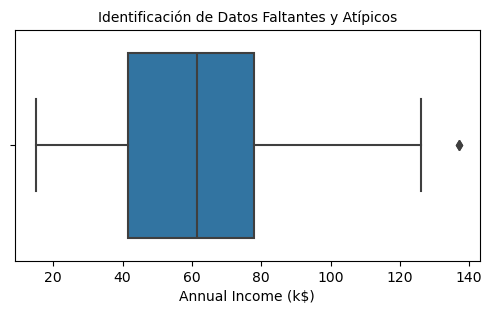

In [73]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Annual Income (k$)'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [74]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en Edad: ",Datos['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en Salario: ",Datos['Annual Income (k$)'].isin([0]).sum())
print("Cantidad de Registros con cero en Score: ",Datos['Spending Score (1-100)'].isin([0]).sum())

Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en Salario:  0
Cantidad de Registros con cero en Score:  0


In [75]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna.

Datos['Annual Income (k$)']=Datos['Annual Income (k$)'].replace(0,Datos['Annual Income (k$)'].mean())

Text(0.5, 1.0, 'Identificación de Datos Atípicos')

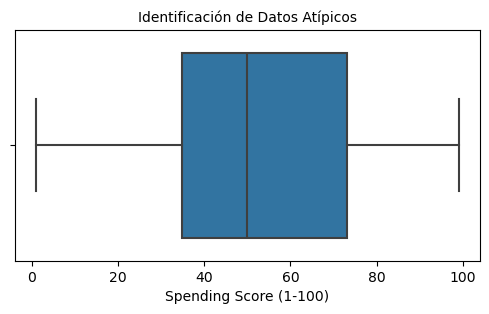

In [76]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Spending Score (1-100)'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [77]:
#Conteo de Datos Atípicos

nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((Datos['Spending Score (1-100)']<nivel_minimo)|(Datos['Spending Score (1-100)']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [78]:
# Filtra Datos Atípicos

Datos=Datos[(Datos['Spending Score (1-100)']<nivel_maximo)&(Datos['Spending Score (1-100)']>nivel_minimo)]

In [79]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [80]:
# Filtrar columnas del modelo 

Datos = Datos[["Age","Annual Income (k$)","Spending Score (1-100)"]]

In [81]:
# Revisión de los datos de las variables objetivo

Datos.head(10)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


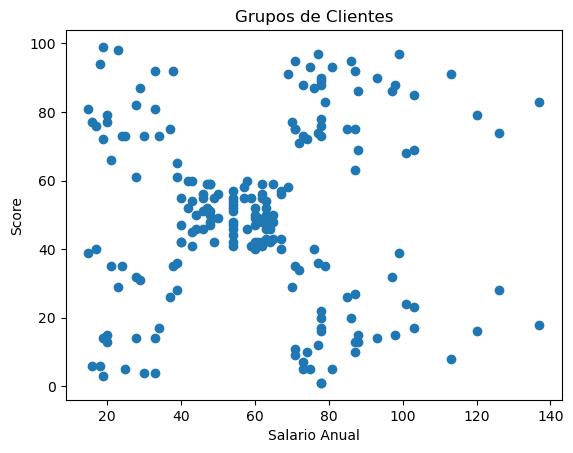

In [82]:
# Grafica antes del agrupamiento

plt.scatter(Datos['Annual Income (k$)'], Datos['Spending Score (1-100)'])
plt.xlabel('Salario Anual')
plt.ylabel('Score')
plt.title('Grupos de Clientes')
plt.show()

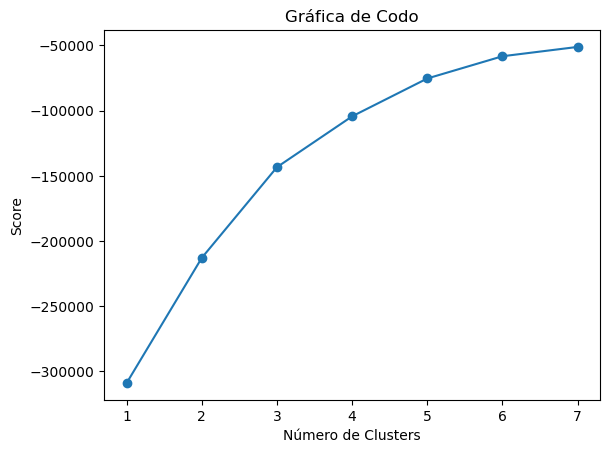

In [83]:
#Se realiza gráfica de codo para identificar valor de K

Nc = range(1, 8)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(Datos).score(Datos) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Gráfica de Codo')
plt.show()

In [84]:
# Generación del modelo de Agrupamiento del modelo con K=5 (Es decir haremos 5 grupos de agrupamiento) 

Modelo = KMeans(n_clusters=5, random_state=0)
Modelo.fit(Datos)
 

KMeans(n_clusters=5, random_state=0)

In [85]:
#Se agrega la columna Grupo a la BD para identificar el numero de grupo del agrupamiento

Modelo.labels_
Datos["Grupo"] = Modelo.labels_ 
print (Datos)

     Age  Annual Income (k$)  Spending Score (1-100)  Grupo
0     19                  15                      39      0
1     21                  15                      81      4
2     20                  16                       6      0
3     23                  16                      77      4
4     31                  17                      40      0
..   ...                 ...                     ...    ...
195   35                 120                      79      1
196   45                 126                      28      3
197   32                 126                      74      1
198   32                 137                      18      3
199   30                 137                      83      1

[200 rows x 4 columns]


In [86]:
# Desempeño del modelo con el Coeficiente de Silhouette el Índice de Calinski-Harabasz y el índice de Davies Bouldin Score

# Preparación de la metrica de la columna Grupo
Observaciones = len(Datos)
X = Datos.drop('Grupo', axis=1)
clusters = Datos['Grupo']

# Se calculan las métricas
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Se crea una tabla para mostrar los valores de las métricas
table_data = [
    ["Numero de Observaciones", Observaciones],
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score]
]

# Imprime la tabla
from tabulate import tabulate
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+--------------------------+---------------------+
|          Metric          |        Value        |
+--------------------------+---------------------+
| Numero de Observaciones  |         200         |
|  Coeficiente Silhouette  | 0.44428597560893024 |
| Indice Calinski Harabasz | 151.04386000160667  |
|  Indice Davies Bouldin   | 0.8218781633199782  |
+--------------------------+---------------------+


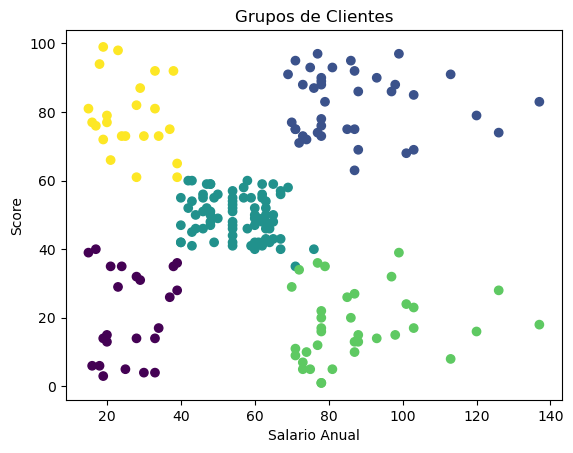

In [87]:
# Creamos un gráfico de dispersión usando matplotlib
# Los ejes x e y corresponden a 'Annual Income (k$)' y 'Spending Score (1-100)' respectivamente
# Los colores de los puntos se determinan por la columna 'Grupo'
plt.scatter(Datos['Annual Income (k$)'], Datos['Spending Score (1-100)'], c=Datos['Grupo'], cmap='viridis')

# Establecemos la etiqueta del eje x como 'Salario Anual'
plt.xlabel('Salario Anual')

# Establecemos la etiqueta del eje y como 'Score'
plt.ylabel('Score')

# Añadimos un título al gráfico
plt.title('Grupos de Clientes')

# Mostramos el gráfico
plt.show()


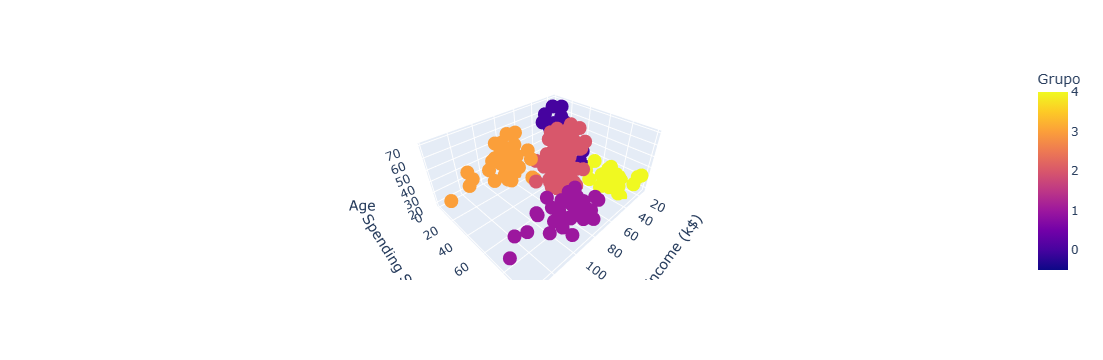

In [88]:
# Creamos un gráfico de dispersión 3D usando plotly express
# Los ejes x, y y z corresponden a 'Annual Income (k$)', 'Spending Score (1-100)' y 'Age' respectivamente
# Los colores y símbolos de los puntos se determinan por la columna 'Grupo'
grafica3D = px.scatter_3d(Datos, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', 
                          z = 'Age', color = 'Grupo', symbol = 'Grupo',
                          # Mapeamos cada valor único en 'Grupo' a un tipo de símbolo específico
                          symbol_map = {0: 'circle', 1: 'circle', 
                                        2: 'circle', 3: 'circle', 4:'circle'})

# Actualizamos el diseño del gráfico para ocultar la leyenda
grafica3D.update_layout(showlegend = False)


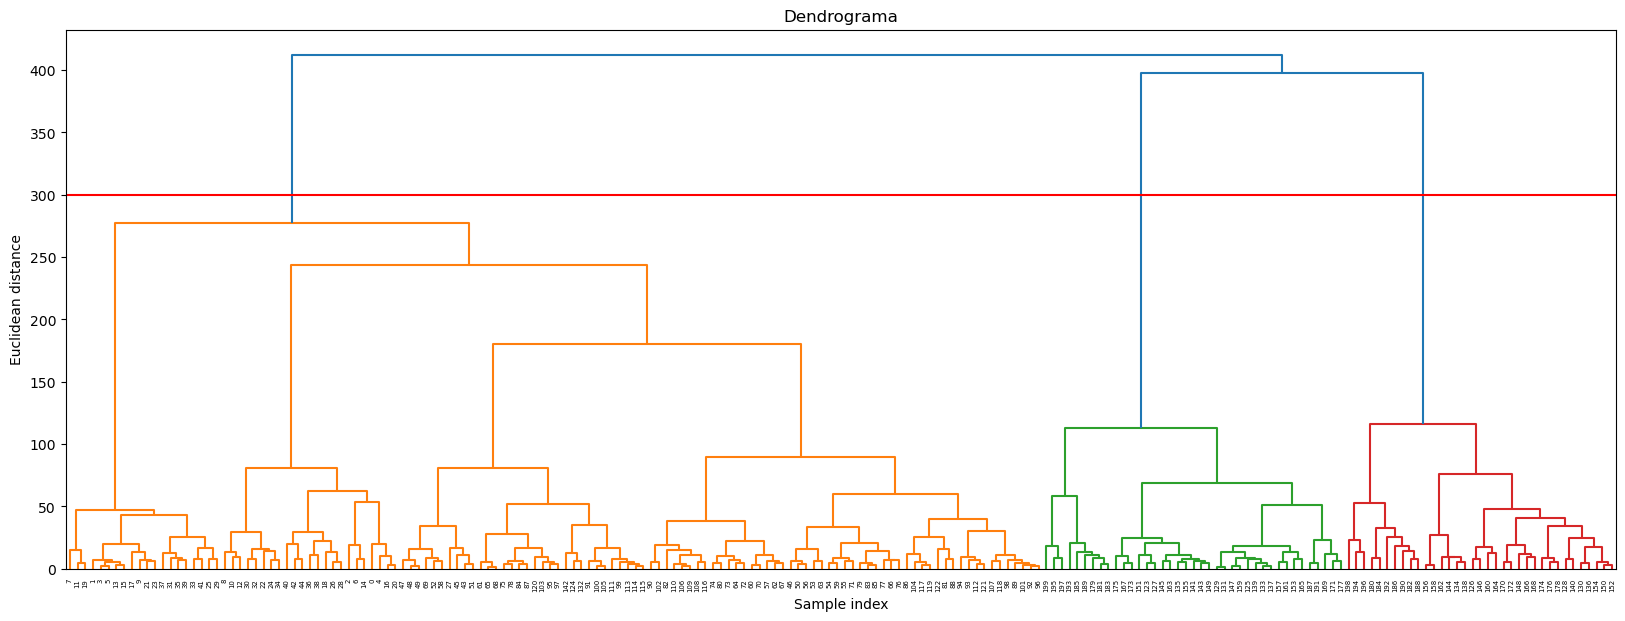

In [89]:
# Realizamos un clustering jerárquico utilizando el método de Ward y la distancia euclidiana
ward_clustering = linkage(X, method="ward", metric="euclidean")

# Creamos una figura con un tamaño específico
plt.figure(figsize=(20,7))

# Generamos el dendrograma a partir del clustering jerárquico
dendrogram(ward_clustering)

# Dibujamos una línea horizontal en y=300 para ayudar a visualizar los cortes en el dendrograma
plt.axhline(y=300, color='r', linestyle='-')

# Añadimos un título al gráfico
plt.title('Dendrograma')

# Establecemos la etiqueta del eje x como 'Sample index'
plt.xlabel('Sample index')

# Establecemos la etiqueta del eje y como 'Euclidean distance'
plt.ylabel('Euclidean distance')

# Mostramos el gráfico
plt.show()

In [90]:
# Creamos un modelo de clustering aglomerativo con 3 clusters
hier_clustering = AgglomerativeClustering(n_clusters=3)

# Ajustamos el modelo a los datos y predecimos las etiquetas de los clusters
labels_hier = hier_clustering.fit_predict(X)

# Imprimimos las etiquetas de los clusters
labels_hier

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

In [91]:
# Definición de las etiquetas (labels) y colores a utilizar
labels = labels_hier  # Suponiendo que labels_hier es una lista de etiquetas
colores = ['red', 'green', 'navy']  # Colores correspondientes a cada etiqueta
asignar = []  # Lista para almacenar los colores asignados a cada etiqueta

# Iteración sobre cada elemento en labels para asignar un color correspondiente
for row in labels:
    asignar.append(colores[row])  # Agregar el color correspondiente a la etiqueta actual a la lista 'asignar'


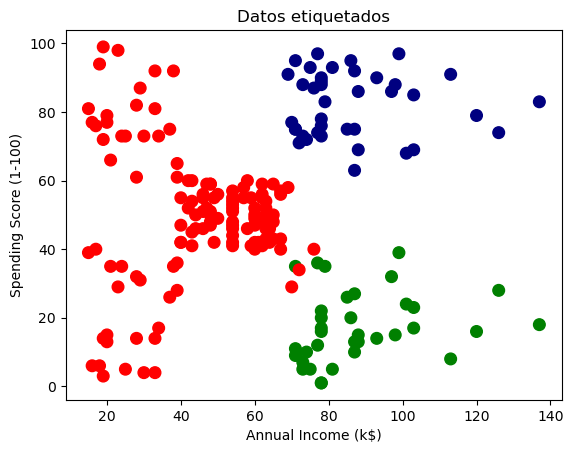

In [92]:
# Extraemos los valores de las columnas 'Annual Income (k$)' y 'Spending Score (1-100)' del DataFrame X
f1 = X['Annual Income (k$)'].values
f2 = X['Spending Score (1-100)'].values

# Creamos un gráfico de dispersión usando matplotlib
# Los ejes x e y corresponden a 'Annual Income (k$)' y 'Spending Score (1-100)' respectivamente
# Los colores de los puntos se determinan por la variable 'asignar'
plt.scatter(f1, f2, c=asignar, s=70)

# Añadimos un título al gráfico
plt.title('Datos etiquetados')

# Establecemos la etiqueta del eje x como 'Annual Income (k$)'
plt.xlabel('Annual Income (k$)')

# Establecemos la etiqueta del eje y como 'Spending Score (1-100)'
plt.ylabel('Spending Score (1-100)')

# Mostramos el gráfico
plt.show()

In [93]:
def plot_dendrogram(model, **kwargs):
    #Esta función extrae la información de un modelo AgglomerativeClustering y traza su dendrograma con la función dendrogram de scipy.cluster.hierarchy

    from scipy.cluster.hierarchy import dendrogram
    import numpy as np

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)

    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    distances = np.arange(model.children_.shape[0])
    linkage_matrix = np.column_stack([model.children_, distances, counts]).astype(float)

    # Plot
    plt.figure(figsize=(20, 7))
    dendrogram(linkage_matrix, **kwargs)
    plt.title('Dendrograma')
    plt.xlabel('Sample index')
    plt.ylabel('Euclidean distance')
    plt.show()

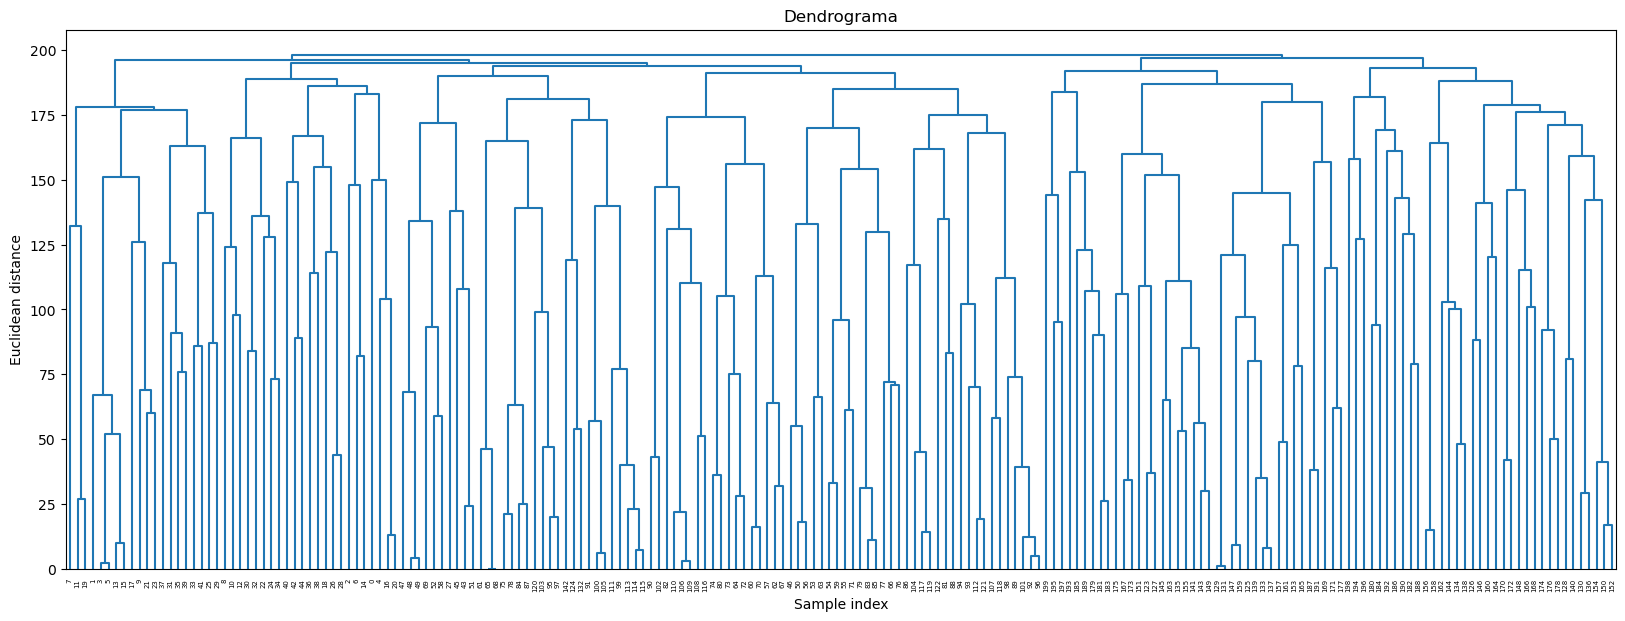

In [94]:
plot_dendrogram(hier_clustering, color_threshold=0)

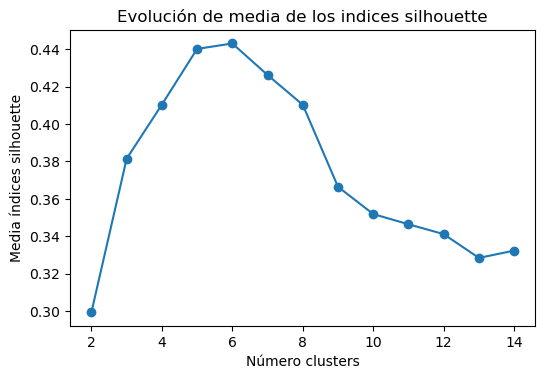

In [95]:
# Definimos el rango de número de clusters que queremos explorar
range_n_clusters = range(2, 15)

# Inicializamos una lista vacía para almacenar los valores medios de los índices silhouette
valores_medios_silhouette = []

# Iteramos sobre el rango de número de clusters
for n_clusters in range_n_clusters: 
    # Creamos el modelo de clustering aglomerativo con la cantidad de clusters actual
    model = AgglomerativeClustering(
        affinity = 'euclidean',  # Usamos distancia euclidiana como medida de distancia
        linkage = "ward",  # Usamos el método de Ward para el enlace entre clusters
        n_clusters = n_clusters  # Definimos el número de clusters
    )

    # Ajustamos el modelo a los datos y obtenemos las etiquetas de los clusters
    cluster_labels = model.fit_predict(X)
    
    # Calculamos el valor medio del índice silhouette para la configuración actual de clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    # Añadimos el valor medio del índice silhouette a la lista
    valores_medios_silhouette.append(silhouette_avg)

# Creamos una figura para visualizar los resultados
fig, ax = plt.subplots(1, 1 , figsize = (6, 3.84))

# Graficamos la evolución de la media de los índices silhouette en función del número de clusters
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')

# Añadimos títulos y etiquetas a los ejes
ax.set_title("Evolución de media de los indices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette')

# Mostramos la gráfica
plt.show()

In [96]:
#Calcular medidas de calidad para Clustering Jerárquico print("\nMedidas de calidad para Clustering Jerárquico:")
from sklearn import metrics
print("Medidas de calidad para Clustering Jerárquico")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels_hier))
print("Indice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels_hier)) 
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels_hier))

Medidas de calidad para Clustering Jerárquico
Puntaje de silueta: 0.38141795042544546
Indice de Calinski-Harabasz: 111.4623243273518
Davies-Bouldin Index: 0.8603032525623284


In [97]:
#Calcular el coeficiente de correlación cofenética

from scipy.cluster.hierarchy import linkage

#Calcula las distancias

X_dist=pdist(X)

#Calcula la matriz de enlace

Z =linkage(X, 'ward')

#Calcula el coeficiente de correlación cofenético

coef_cofenetico=cophenet(Z, X_dist)

print("Coeficiente de correlación cofenética:", coef_cofenetico)

Coeficiente de correlación cofenética: (0.66866802140347, array([277.42153431,  53.60747993, 277.42153431, ..., 397.74740753,
        18.27566688, 397.74740753]))
